# Loan Application MLP model

## Data Preparation and Pre-processing

In [ ]:
import pandas as pd

In [ ]:
train_ds = pd.read_excel("Loan_Application.xlsx")

In [ ]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1570 non-null   int64  
 1   Decision      1570 non-null   int64  
 2   Selfcon_Code  1570 non-null   int64  
 3   Tier_1        1570 non-null   int64  
 4   Tier_2        1570 non-null   int64  
 5   AccoClass     1570 non-null   int64  
 6   LoanType      1570 non-null   int64  
 7   Gender        1570 non-null   int64  
 8   Etype         1570 non-null   int64  
 9   Doc_pf        1570 non-null   int64  
 10  Marstat       1570 non-null   int64  
 11  Emp_Type_1    1570 non-null   int64  
 12  Emp_Type_2    1570 non-null   int64  
 13  Emp_Type_3    1570 non-null   int64  
 14  Educlass_2    1570 non-null   int64  
 15  Educlass_1    1570 non-null   int64  
 16  Oriclass_1    1570 non-null   int64  
 17  Oriclass_2    1570 non-null   int64  
 18  eom_25        1570 non-null 

We see that we have the demographic variables such as Age, Gender etc., financial variables such as Disposable Income, Bank Savings etc, property related variables such as market value, transaction related variables such as term, down payment etc. and mortgage ratios such as IIR (Installment to Income Ratio), LTV (Loan to Market value of the property), etc. as the independent variables.

In [ ]:
# Setting up Independent and Dependent Variable

X = train_ds.iloc[:, 2:] # Independent Variable -- All variables after Decision Variable
y = train_ds.iloc[:, 1]  # Dependent variable --- "Decision" Variable

In [ ]:
num_inputs = X.shape[1]
print("Total number of independent variables: {}".format(num_inputs))

Total number of independent variables: 36


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 0)

In [ ]:
# Feature Scaling

# Since we have variables such as age, salary etc. whose magnitude are of different
# scale i.e. age is within hundred and disposable income is in thousands, and since 
# gradient descent converges faster when the variables 
# are of similar relative scale, it is advisable to perform feature scaling. 

from sklearn.preprocessing import StandardScaler  # Standardization

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

## Model Building

In [ ]:
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Initialising the MLP
classifier = Sequential(

In [ ]:
# Input and Hidden Layer
classifier.add(Dense(input_dim=num_inputs, activation="relu", units=50))

In [ ]:
# Output Layer
classifier.add(Dense(activation="sigmoid", units=1))

In [ ]:
# Model Summary

classifier.summary()
# number of parameters = (input neurons + 1 for bias) * output neurons

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                1850      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 1,901
Trainable params: 1,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
hist = classifier.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size = 10, epochs = 100)

Epoch 1/100
126/126 [==============================] - 0s 3ms/step - loss: 0.5613 - accuracy: 0.7500 - val_loss: 0.4865 - val_accuracy: 0.8153
Epoch 2/100
126/126 [==============================] - 0s 3ms/step - loss: 0.4798 - accuracy: 0.8033 - val_loss: 0.4639 - val_accuracy: 0.8121
Epoch 3/100
126/126 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.8065 - val_loss: 0.4487 - val_accuracy: 0.8153
Epoch 4/100
126/126 [==============================] - 0s 3ms/step - loss: 0.4383 - accuracy: 0.8097 - val_loss: 0.4383 - val_accuracy: 0.8089
Epoch 5/100
126/126 [==============================] - 0s 2ms/step - loss: 0.4242 - accuracy: 0.8097 - val_loss: 0.4300 - val_accuracy: 0.8121
Epoch 6/100
126/126 [==============================] - 0s 3ms/step - loss: 0.4121 - accuracy: 0.8137 - val_loss: 0.4236 - val_accuracy: 0.8089
Epoch 7/100
126/126 [==============================] - 0s 3ms/step - loss: 0.4021 - accuracy: 0.8177 - val_loss: 0.4186 - val_accuracy: 0.8089

### Model Prediction & Evaluation

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_valid)
y_pred = (y_pred > 0.5)

In [ ]:
print('Accuracy: {0}%'.format(accuracy_score(y_valid, y_pred) * 100))

Accuracy: 79.29936305732484%


### Training and Validation plots

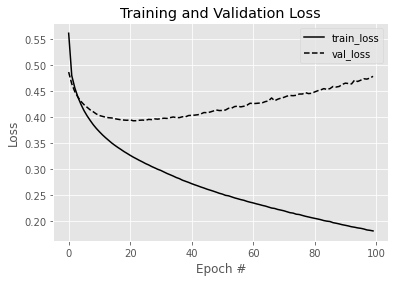

In [ ]:
# plot the training and validation loss

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.plot(np.arange(0, 100), hist.history["loss"], label="train_loss", color='black' )
plt.plot(np.arange(0, 100), hist.history["val_loss"], label="val_loss", color='black', linestyle='--')
plt.title("Training and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

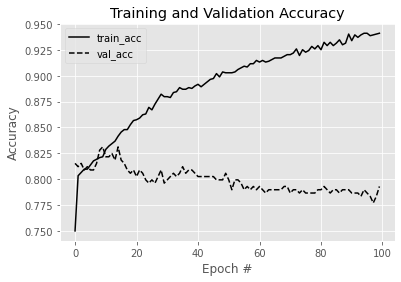

In [ ]:
# plot the training and validation accuracy

plt.style.use('ggplot')
plt.plot(np.arange(0, 100), hist.history["accuracy"], label="train_acc", color='black')
plt.plot(np.arange(0, 100), hist.history["val_accuracy"], label="val_acc", color='black', linestyle='--')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Early Stopping

The gap between the training and validation loss is quite evident in the early few epochs itself, a clear sign of over-fitting. So, instead of running 100 epochs, and then recognizing that issue quite late, we can use "Early Stopping" and stop the epochs earlier itself, thereby intervening faster and saving time.




In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stoppping = EarlyStopping(monitor='val_loss', verbose=1, patience=20)

In [ ]:
classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
hist = classifier.fit(X_tratrain, validation_data=(X_valid, y_valid), batch_size = 10, epochs = 100,
                      callbacks=[early_stopping])

Epoch 1/100
126/126 [==============================] - 0s 3ms/step - loss: 0.5372 - accuracy: 0.7747 - val_loss: 0.5335 - val_accuracy: 0.7930
Epoch 2/100
126/126 [==============================] - 0s 3ms/step - loss: 0.4757 - accuracy: 0.8010 - val_loss: 0.4930 - val_accuracy: 0.7930
Epoch 3/100
126/126 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.8018 - val_loss: 0.4670 - val_accuracy: 0.8057
Epoch 4/100
126/126 [==============================] - 0s 3ms/step - loss: 0.4284 - accuracy: 0.8105 - val_loss: 0.4518 - val_accuracy: 0.8153
Epoch 5/100
126/126 [==============================] - 0s 3ms/step - loss: 0.4131 - accuracy: 0.8153 - val_loss: 0.4406 - val_accuracy: 0.8121
Epoch 6/100
126/126 [==============================] - 0s 3ms/step - loss: 0.4005 - accuracy: 0.8225 - val_loss: 0.4312 - val_accuracy: 0.8057
Epoch 7/100
126/126 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 0.8256 - val_loss: 0.4233 - val_accuracy: 0.8089

Since the gap between training and validation loss/accuracy had started to increase, we see that the model stops training much before the total epochs it had to complete.

This indicates over-fitting issue which needs to be addressed. We shall do that as per our next exercise.